## In our group, we collected keystroke data on 5 users among 4 different devices(Samsung small, Samsung big, Nexus5 and Nexus7)

# This file is for Samsung small in our group project

In [76]:
import csv
import sys
import numpy as np
import pandas as pd 
import re
from datetime import datetime
import math
import matplotlib
import seaborn as sns
from collections import Counter
%matplotlib inline

In [77]:

with open('SamsungS.csv', 'r') as f:
    df = pd.read_csv(f, sep=',', low_memory=False, names=['ID','UUID','Language','Hardware_Model','SDK_Version','Manufacture','Screen_Size','Time_Zone','Date_Time','Country_Code','Num_of_CPU_Cores','Location','Location_lat','Location_long','Button','Touch_Pressure','Touch_Size','X_Coordinate','Y_Coordinate','X_Precision','Y_Precision','Action_Type','Action_Timestamp','HR_Timestamp'], skiprows=1)

# Data Selection

### By checking the unique value, most attributes have low values are not selected(and pressure)

In [78]:
df.shape

(16935, 24)

In [79]:
df=df.drop_duplicates('Action_Timestamp', keep='last')
df=df.reset_index(drop=True)

In [80]:
df.apply(pd.Series.nunique)

ID                  16457
UUID                    5
Language                1
Hardware_Model          1
SDK_Version             1
Manufacture             1
Screen_Size             1
Time_Zone               1
Date_Time             500
Country_Code            1
Num_of_CPU_Cores        1
Location                1
Location_lat            1
Location_long           1
Button                 25
Touch_Pressure          1
Touch_Size             20
X_Coordinate          773
Y_Coordinate          525
X_Precision             1
Y_Precision             1
Action_Type             2
Action_Timestamp    16457
HR_Timestamp          500
dtype: int64

### I displayed the dataframe to make sure the pressure has problem

In [81]:
df

,ID,UUID,Language,Hardware_Model,SDK_Version,Manufacture,Screen_Size,Time_Zone,Date_Time,Country_Code,...,Button,Touch_Pressure,Touch_Size,X_Coordinate,Y_Coordinate,X_Precision,Y_Precision,Action_Type,Action_Timestamp,HR_Timestamp
0,63,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,NUMBERS,1.0,0.011765,108.000000,614.0,1.0,1.0,Down,108781159,2017-05-23 15:13:59
1,64,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,LETTERS,1.0,0.011765,108.000000,614.0,1.0,1.0,Up,108781226,2017-05-23 15:13:59
2,65,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,.,1.0,0.015686,177.000000,542.0,1.0,1.0,Down,108781488,2017-05-23 15:13:59
3,66,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,.,1.0,0.015686,177.000000,542.0,1.0,1.0,Up,108781555,2017-05-23 15:13:59
4,67,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,LETTERS,1.0,0.009804,145.000000,613.0,1.0,1.0,Down,108782335,2017-05-23 15:13:59
5,68,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,NUMBERS,1.0,0.009804,145.000000,613.0,1.0,1.0,Up,108782417,2017-05-23 15:13:59
6,69,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,t,1.0,0.025490,355.000000,419.0,1.0,1.0,Down,108782859,2017-05-23 15:13:59
7,70,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,t,1.0,0.025490,355.000000,419.0,1.0,1.0,Up,108782927,2017-05-23 15:13:59
8,71,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,i,1.0,0.021569,579.000000,431.0,1.0,1.0,Down,108783091,2017-05-23 15:13:59
9,72,test2,ä¸­æ–‡,Samsung SM-T330NU,22,samsung,7.995917,America/Vancouver,108778628,CN,...,i,1.0,0.021569,579.000000,431.0,1.0,1.0,Up,108783145,2017-05-23 15:13:59


In [82]:
event_count = Counter(df["Button"])
event_count

Counter({'.': 1001,
         '4': 12,
         '5': 1002,
         'DELETE': 186,
         'DONE': 1000,
         'LETTERS': 2039,
         'NUMBERS': 2031,
         'O': 2,
         'R': 484,
         'SHIFT': 1016,
         'T': 1,
         'a': 1012,
         'd': 4,
         'e': 1026,
         'f': 2,
         'i': 1026,
         'l': 1012,
         'n': 1016,
         'o': 1008,
         'r': 525,
         's': 28,
         't': 1011,
         'u': 4,
         'w': 6,
         'z': 3})

In [83]:
ulist=df[['UUID','Action_Timestamp']]
ulist

,UUID,Action_Timestamp
0,test2,108781159
1,test2,108781226
2,test2,108781488
3,test2,108781555
4,test2,108782335
5,test2,108782417
6,test2,108782859
7,test2,108782927
8,test2,108783091
9,test2,108783145


In [84]:
def isCorrectPassword(df, i):
    # for idx in range(i, i+32):
    #    print (idx, "\t", df.iloc[idx]["Button"],"\t",df.iloc[idx]["Action_Type"])
    if (df.iloc[i]['Button'] == 'LETTERS' or df.iloc[i]['Button'] == 'NUMBERS') and df.iloc[i]['Action_Type'] == 'Down' and \
                (df.iloc[i+1]['Button'] == 'LETTERS' or df.iloc[i+1]['Button'] == 'NUMBERS') and df.iloc[i+1]['Action_Type'] == 'Up' and \
                df.iloc[i+2]['Button'] == '.' and df.iloc[i+2]['Action_Type'] == 'Down' and \
                df.iloc[i+3]['Button'] == '.' and df.iloc[i+3]['Action_Type'] == 'Up' and \
                (df.iloc[i+4]['Button'] == 'LETTERS' or df.iloc[i+4]['Button'] == 'NUMBERS') and df.iloc[i+4]['Action_Type'] == 'Down' and \
                (df.iloc[i+5]['Button'] == 'LETTERS' or df.iloc[i+5]['Button'] == 'NUMBERS') and df.iloc[i+5]['Action_Type'] == 'Up' and \
                df.iloc[i+6]['Button'] == 't' and df.iloc[i+6]['Action_Type'] == 'Down' and \
                df.iloc[i+7]['Button'] == 't' and df.iloc[i+7]['Action_Type'] == 'Up'and \
                df.iloc[i+8]['Button'] == 'i' and df.iloc[i+8]['Action_Type'] == 'Down' and \
                df.iloc[i+9]['Button'] == 'i' and df.iloc[i+9]['Action_Type'] == 'Up'and \
                df.iloc[i+10]['Button'] == 'e' and df.iloc[i+10]['Action_Type'] == 'Down' and \
                df.iloc[i+11]['Button'] == 'e' and df.iloc[i+11]['Action_Type'] == 'Up' and \
                (df.iloc[i+12]['Button'] == 'LETTERS' or df.iloc[i+12]['Button'] == 'NUMBERS') and df.iloc[i+12]['Action_Type'] == 'Down' and \
                (df.iloc[i+13]['Button'] == 'LETTERS' or df.iloc[i+13]['Button'] == 'NUMBERS') and df.iloc[i+13]['Action_Type'] == 'Up' and \
                df.iloc[i+14]['Button'] == '5' and df.iloc[i+14]['Action_Type'] == 'Down' and \
                df.iloc[i+15]['Button'] == '5' and df.iloc[i+15]['Action_Type'] == 'Up' and \
                (df.iloc[i+16]['Button'] == 'LETTERS' or df.iloc[i+16]['Button'] == 'NUMBERS') and df.iloc[i+16]['Action_Type'] == 'Down' and \
                (df.iloc[i+17]['Button'] == 'LETTERS' or df.iloc[i+17]['Button'] == 'NUMBERS') and df.iloc[i+17]['Action_Type'] == 'Up' and \
                df.iloc[i+18]['Button'] == 'SHIFT' and df.iloc[i+18]['Action_Type'] == 'Down' and \
                df.iloc[i+19]['Button'] == 'SHIFT' and df.iloc[i+19]['Action_Type'] == 'Up' and \
                (df.iloc[i+20]['Button'] == 'R' or df.iloc[i+20]['Button'] == 'r' ) and df.iloc[i+20]['Action_Type'] == 'Down' and \
                (df.iloc[i+21]['Button'] == 'r' or df.iloc[i+21]['Button'] == 'R') and df.iloc[i+21]['Action_Type'] == 'Up' and \
                df.iloc[i+22]['Button'] == 'o' and df.iloc[i+22]['Action_Type'] == 'Down' and \
                df.iloc[i+23]['Button'] == 'o' and df.iloc[i+23]['Action_Type'] == 'Up' and \
                df.iloc[i+24]['Button'] == 'a' and df.iloc[i+24]['Action_Type'] == 'Down' and \
                df.iloc[i+25]['Button'] == 'a' and df.iloc[i+25]['Action_Type'] == 'Up' and \
                df.iloc[i+26]['Button'] == 'n' and df.iloc[i+26]['Action_Type'] == 'Down' and \
                df.iloc[i+27]['Button'] == 'n' and df.iloc[i+27]['Action_Type'] == 'Up' and \
                df.iloc[i+28]['Button'] == 'l' and df.iloc[i+28]['Action_Type'] == 'Down' and \
                df.iloc[i+29]['Button'] == 'l' and df.iloc[i+29]['Action_Type'] == 'Up' and \
                df.iloc[i+30]['Button'] == 'DONE' and df.iloc[i+30]['Action_Type'] == 'Down' and \
                df.iloc[i+31]['Button'] == 'DONE' and df.iloc[i+31]['Action_Type'] == 'Up':
                    # print ("Found a Password that starts at index ",i, " for user ", df.iloc[i]["UUID"])
                    return True
    else:
        return False

In [85]:
ulist = pd.DataFrame(columns = ('UUID','Action_Timestamp'))
df1 = pd.DataFrame()
counter = 0
for i in range(0, len(df)):
        if i+31 < len(df) and isCorrectPassword(df, i):
            df1 = df1.append(df.iloc[i:i+32], ignore_index=True)
            counter = counter +1
            ulist.loc[len(ulist)]=[df.iloc[i]['UUID'],df.iloc[i]['Action_Timestamp']]
users_count = ulist.groupby(['UUID']).Action_Timestamp.nunique()

In [86]:
users_count = users_count.sort_values()
users_count

UUID
test4    78
test5    81
test3    88
test2    96
test1    99
Name: Action_Timestamp, dtype: int64

### Due to the high correct rate. I selected all users

In [87]:
aList = []
for x in range(0, len(users_count)):
    if (users_count[x]>=50): 
        aList.append(users_count.keys()[x])
aList

['test4', 'test5', 'test3', 'test2', 'test1']

# Data extraction( data selection is processed when the features dataframe is created)

### Dataframe for touchSize,down-up time, down-dwon time and flying time features

In [88]:
features = pd.DataFrame(columns=("f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","dd1","dd2","dd3","dd4","dd5","dd6","dd7","dd8","dd9","dd10","dd11","dd12","dd13","dd14","dd15","duLN1","du.2","duLN3","dut4","dui5","due6","duLN7","du58","duLN9","duSH10","dur11","duo12","dua13","dun14","dul15","duDO16","tsizeLN1","tisze.2","tsizeLN3","tsizet4","tsizei5","tsizee6","tsizeLN7","tsize58","tsizeLN9","tsizeSH10","tsizer11","tsizeo12","tsizea13","tsizen14","tsizel15","tsizeDO16",\
                                     "UUID"\
                                     ))

for id in aList:

    print('# Adding instances for User ' + str(id))

    idxn = 0

    for i in range(0, len(df)):

        if df.iloc[i]["UUID"] == id and (df.iloc[i]["Button"] == 'LETTERS' or df.iloc[i]["Button"] == 'NUMBERS') and df.iloc[i]["Action_Type"] == 'Down' and idxn < 50:

            features.loc[len(features)] = [\
                                           
                                            #flying time
                                            int(df.iloc[i+2]["Action_Timestamp"]) - int(df.iloc[i+1]["Action_Timestamp"]),\

                                            int(df.iloc[i+4]["Action_Timestamp"]) - int(df.iloc[i+3]["Action_Timestamp"]),\

                                            int(df.iloc[i+6]["Action_Timestamp"]) - int(df.iloc[i+5]["Action_Timestamp"]),\

                                            int(df.iloc[i+8]["Action_Timestamp"]) - int(df.iloc[i+7]["Action_Timestamp"]),\

                                            int(df.iloc[i+10]["Action_Timestamp"]) - int(df.iloc[i+9]["Action_Timestamp"]),\

                                            int(df.iloc[i+12]["Action_Timestamp"]) - int(df.iloc[i+11]["Action_Timestamp"]),\

                                            int(df.iloc[i+14]["Action_Timestamp"]) - int(df.iloc[i+13]["Action_Timestamp"]),\

                                            int(df.iloc[i+16]["Action_Timestamp"]) - int(df.iloc[i+15]["Action_Timestamp"]),\

                                            int(df.iloc[i+18]["Action_Timestamp"]) - int(df.iloc[i+17]["Action_Timestamp"]),\

                                            int(df.iloc[i+20]["Action_Timestamp"]) - int(df.iloc[i+19]["Action_Timestamp"]),\

                                            int(df.iloc[i+22]["Action_Timestamp"]) - int(df.iloc[i+21]["Action_Timestamp"]),\

                                            int(df.iloc[i+24]["Action_Timestamp"]) - int(df.iloc[i+23]["Action_Timestamp"]),\

                                            int(df.iloc[i+26]["Action_Timestamp"]) - int(df.iloc[i+25]["Action_Timestamp"]),\

                                            int(df.iloc[i+28]["Action_Timestamp"]) - int(df.iloc[i+27]["Action_Timestamp"]),\

                                            int(df.iloc[i+30]["Action_Timestamp"]) - int(df.iloc[i+29]["Action_Timestamp"]),\
                                            
                                            #Down-Down
                                            int(df.iloc[i+2]["Action_Timestamp"]) - int(df.iloc[i]["Action_Timestamp"]),\

                                            int(df.iloc[i+4]["Action_Timestamp"]) - int(df.iloc[i+2]["Action_Timestamp"]),\

                                            int(df.iloc[i+6]["Action_Timestamp"]) - int(df.iloc[i+4]["Action_Timestamp"]),\

                                            int(df.iloc[i+8]["Action_Timestamp"]) - int(df.iloc[i+6]["Action_Timestamp"]),\

                                            int(df.iloc[i+10]["Action_Timestamp"]) - int(df.iloc[i+8]["Action_Timestamp"]),\

                                            int(df.iloc[i+12]["Action_Timestamp"]) - int(df.iloc[i+10]["Action_Timestamp"]),\

                                            int(df.iloc[i+14]["Action_Timestamp"]) - int(df.iloc[i+12]["Action_Timestamp"]),\

                                            int(df.iloc[i+16]["Action_Timestamp"]) - int(df.iloc[i+14]["Action_Timestamp"]),\

                                            int(df.iloc[i+18]["Action_Timestamp"]) - int(df.iloc[i+16]["Action_Timestamp"]),\

                                            int(df.iloc[i+20]["Action_Timestamp"]) - int(df.iloc[i+18]["Action_Timestamp"]),\

                                            int(df.iloc[i+22]["Action_Timestamp"]) - int(df.iloc[i+20]["Action_Timestamp"]),\

                                            int(df.iloc[i+24]["Action_Timestamp"]) - int(df.iloc[i+22]["Action_Timestamp"]),\

                                            int(df.iloc[i+26]["Action_Timestamp"]) - int(df.iloc[i+24]["Action_Timestamp"]),\

                                            int(df.iloc[i+28]["Action_Timestamp"]) - int(df.iloc[i+26]["Action_Timestamp"]),\

                                            int(df.iloc[i+30]["Action_Timestamp"]) - int(df.iloc[i+28]["Action_Timestamp"]),\

                                            
                                           
                                            #down-up(hold time)
                                            int(df.iloc[i+1]["Action_Timestamp"]) - int(df.iloc[i]["Action_Timestamp"]),\

                                            int(df.iloc[i+3]["Action_Timestamp"]) - int(df.iloc[i+2]["Action_Timestamp"]),\

                                            int(df.iloc[i+5]["Action_Timestamp"]) - int(df.iloc[i+4]["Action_Timestamp"]),\

                                            int(df.iloc[i+7]["Action_Timestamp"]) - int(df.iloc[i+6]["Action_Timestamp"]),\

                                            int(df.iloc[i+9]["Action_Timestamp"]) - int(df.iloc[i+8]["Action_Timestamp"]),\

                                            int(df.iloc[i+11]["Action_Timestamp"]) - int(df.iloc[i+10]["Action_Timestamp"]),\

                                            int(df.iloc[i+13]["Action_Timestamp"]) - int(df.iloc[i+12]["Action_Timestamp"]),\

                                            int(df.iloc[i+15]["Action_Timestamp"]) - int(df.iloc[i+14]["Action_Timestamp"]),\

                                            int(df.iloc[i+17]["Action_Timestamp"]) - int(df.iloc[i+16]["Action_Timestamp"]),\

                                            int(df.iloc[i+19]["Action_Timestamp"]) - int(df.iloc[i+18]["Action_Timestamp"]),\

                                            int(df.iloc[i+21]["Action_Timestamp"]) - int(df.iloc[i+20]["Action_Timestamp"]),\

                                            int(df.iloc[i+23]["Action_Timestamp"]) - int(df.iloc[i+22]["Action_Timestamp"]),\

                                            int(df.iloc[i+25]["Action_Timestamp"]) - int(df.iloc[i+24]["Action_Timestamp"]),\

                                            int(df.iloc[i+27]["Action_Timestamp"]) - int(df.iloc[i+26]["Action_Timestamp"]),\

                                            int(df.iloc[i+29]["Action_Timestamp"]) - int(df.iloc[i+28]["Action_Timestamp"]),\

                                            int(df.iloc[i+31]["Action_Timestamp"]) - int(df.iloc[i+30]["Action_Timestamp"]),\
                                            


                                            #Touch size for each key entry
                                            df.iloc[i+1]["Touch_Size"],\

                                            df.iloc[i+3]["Touch_Size"],\

                                            df.iloc[i+5]["Touch_Size"],\

                                            df.iloc[i+7]["Touch_Size"],\

                                            df.iloc[i+9]["Touch_Size"],\

                                            df.iloc[i+11]["Touch_Size"],\

                                            df.iloc[i+13]["Touch_Size"],\

                                            df.iloc[i+15]["Touch_Size"],\

                                            df.iloc[i+17]["Touch_Size"],\

                                            df.iloc[i+19]["Touch_Size"],\

                                            df.iloc[i+21]["Touch_Size"],\

                                            df.iloc[i+23]["Touch_Size"],\

                                            df.iloc[i+25]["Touch_Size"],\

                                            df.iloc[i+27]["Touch_Size"],\

                                            df.iloc[i+29]["Touch_Size"],\

                                            df.iloc[i+31]["Touch_Size"],\
                                            id\

                                            ]

            idxn = idxn +1

            i = i + 32

# Adding instances for User test4
# Adding instances for User test5
# Adding instances for User test3
# Adding instances for User test2
# Adding instances for User test1


In [89]:
X, y = features.iloc[:, : -1  ],features.iloc[:,-1]

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [91]:
X

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,tsizeLN7,tsize58,tsizeLN9,tsizeSH10,tsizer11,tsizeo12,tsizea13,tsizen14,tsizel15,tsizeDO16
0,1420.0,614.0,926.0,170.0,799.0,366.0,340.0,311.0,255.0,597.0,...,0.003922,0.025490,0.021569,0.015686,0.015686,0.021569,0.021569,0.017647,0.023529,0.017647
1,926.0,170.0,799.0,366.0,340.0,311.0,255.0,597.0,468.0,410.0,...,0.021569,0.015686,0.015686,0.021569,0.021569,0.017647,0.023529,0.017647,0.019608,0.023529
2,340.0,311.0,255.0,597.0,468.0,410.0,227.0,226.0,240.0,1178.0,...,0.021569,0.017647,0.023529,0.017647,0.019608,0.023529,0.007843,0.023529,0.021569,0.021569
3,255.0,597.0,468.0,410.0,227.0,226.0,240.0,1178.0,411.0,168.0,...,0.023529,0.017647,0.019608,0.023529,0.007843,0.023529,0.021569,0.021569,0.021569,0.021569
4,411.0,168.0,383.0,169.0,212.0,241.0,369.0,367.0,212.0,397.0,...,0.021569,0.021569,0.007843,0.017647,0.019608,0.011765,0.013725,0.025490,0.011765,0.027451
5,383.0,169.0,212.0,241.0,369.0,367.0,212.0,397.0,268.0,169.0,...,0.007843,0.017647,0.019608,0.011765,0.013725,0.025490,0.011765,0.027451,0.011765,0.017647
6,369.0,367.0,212.0,397.0,268.0,169.0,184.0,253.0,169.0,837.0,...,0.013725,0.025490,0.011765,0.027451,0.011765,0.017647,0.011765,0.031373,0.023529,0.025490
7,212.0,397.0,268.0,169.0,184.0,253.0,169.0,837.0,382.0,396.0,...,0.011765,0.027451,0.011765,0.017647,0.011765,0.031373,0.023529,0.025490,0.021569,0.027451
8,382.0,396.0,540.0,156.0,283.0,482.0,383.0,326.0,254.0,341.0,...,0.021569,0.027451,0.011765,0.015686,0.029412,0.023529,0.007843,0.015686,0.007843,0.027451
9,540.0,156.0,283.0,482.0,383.0,326.0,254.0,341.0,383.0,240.0,...,0.011765,0.015686,0.029412,0.023529,0.007843,0.015686,0.007843,0.027451,0.005882,0.009804


In [92]:
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (200, 62)
y_train shape: (200,)
X_test shape: (50, 62)
y_test shape: (50,)


In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

In [94]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [95]:
print(rf.score(X_train,y_train))

1.0


In [96]:
rf.predict(X_train)

array(['test1', 'test5', 'test3', 'test3', 'test2', 'test3', 'test3',
       'test4', 'test4', 'test3', 'test2', 'test2', 'test2', 'test2',
       'test4', 'test2', 'test4', 'test2', 'test3', 'test5', 'test5',
       'test1', 'test2', 'test2', 'test2', 'test5', 'test5', 'test1',
       'test2', 'test1', 'test5', 'test4', 'test2', 'test4', 'test5',
       'test1', 'test5', 'test3', 'test5', 'test5', 'test3', 'test2',
       'test5', 'test3', 'test4', 'test4', 'test4', 'test2', 'test3',
       'test4', 'test1', 'test5', 'test5', 'test1', 'test3', 'test1',
       'test5', 'test1', 'test5', 'test1', 'test3', 'test3', 'test3',
       'test5', 'test5', 'test2', 'test3', 'test1', 'test5', 'test2',
       'test4', 'test2', 'test1', 'test2', 'test1', 'test2', 'test1',
       'test2', 'test5', 'test3', 'test2', 'test2', 'test4', 'test1',
       'test2', 'test4', 'test3', 'test3', 'test4', 'test1', 'test1',
       'test2', 'test1', 'test5', 'test2', 'test1', 'test1', 'test4',
       'test2', 'tes

In [97]:
from sklearn.model_selection import cross_val_score
rfscores = cross_val_score(rf, X_train, y_train, cv =10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.86956522  0.72727273  0.90909091  0.85714286  0.9         0.75
  0.83333333  0.88888889  0.55555556  0.77777778]  mean: 0.80686272664533543  std: 0.103239


### 80.6% is pretty low, so I did data reduction in order to improve the accuracy

In [98]:
features

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,tsize58,tsizeLN9,tsizeSH10,tsizer11,tsizeo12,tsizea13,tsizen14,tsizel15,tsizeDO16,UUID
0,1420.0,614.0,926.0,170.0,799.0,366.0,340.0,311.0,255.0,597.0,...,0.025490,0.021569,0.015686,0.015686,0.021569,0.021569,0.017647,0.023529,0.017647,test4
1,926.0,170.0,799.0,366.0,340.0,311.0,255.0,597.0,468.0,410.0,...,0.015686,0.015686,0.021569,0.021569,0.017647,0.023529,0.017647,0.019608,0.023529,test4
2,340.0,311.0,255.0,597.0,468.0,410.0,227.0,226.0,240.0,1178.0,...,0.017647,0.023529,0.017647,0.019608,0.023529,0.007843,0.023529,0.021569,0.021569,test4
3,255.0,597.0,468.0,410.0,227.0,226.0,240.0,1178.0,411.0,168.0,...,0.017647,0.019608,0.023529,0.007843,0.023529,0.021569,0.021569,0.021569,0.021569,test4
4,411.0,168.0,383.0,169.0,212.0,241.0,369.0,367.0,212.0,397.0,...,0.021569,0.007843,0.017647,0.019608,0.011765,0.013725,0.025490,0.011765,0.027451,test4
5,383.0,169.0,212.0,241.0,369.0,367.0,212.0,397.0,268.0,169.0,...,0.017647,0.019608,0.011765,0.013725,0.025490,0.011765,0.027451,0.011765,0.017647,test4
6,369.0,367.0,212.0,397.0,268.0,169.0,184.0,253.0,169.0,837.0,...,0.025490,0.011765,0.027451,0.011765,0.017647,0.011765,0.031373,0.023529,0.025490,test4
7,212.0,397.0,268.0,169.0,184.0,253.0,169.0,837.0,382.0,396.0,...,0.027451,0.011765,0.017647,0.011765,0.031373,0.023529,0.025490,0.021569,0.027451,test4
8,382.0,396.0,540.0,156.0,283.0,482.0,383.0,326.0,254.0,341.0,...,0.027451,0.011765,0.015686,0.029412,0.023529,0.007843,0.015686,0.007843,0.027451,test4
9,540.0,156.0,283.0,482.0,383.0,326.0,254.0,341.0,383.0,240.0,...,0.015686,0.029412,0.023529,0.007843,0.015686,0.007843,0.027451,0.005882,0.009804,test4


# Data reduction

### To improve the accuracy, I deleted touchsize which seems has the lowest unique value. The dataset of touchsize also showed the lowest ranking in Weka

In [99]:
features.apply(pd.Series.nunique)

f1           165
f2           157
f3           172
f4           168
f5           157
f6           167
f7           171
f8           189
f9           168
f10          186
f11          168
f12          151
f13          153
f14          181
f15          172
dd1          186
dd2          173
dd3          188
dd4          185
dd5          170
dd6          179
dd7          184
dd8          195
dd9          185
dd10         189
dd11         186
dd12         163
dd13         174
dd14         197
dd15         187
            ... 
dut4          38
dui5          39
due6          34
duLN7         41
du58          40
duLN9         45
duSH10        43
dur11         44
duo12         37
dua13         37
dun14         35
dul15         38
duDO16        34
tsizeLN1      17
tisze.2       18
tsizeLN3      17
tsizet4       18
tsizei5       17
tsizee6       16
tsizeLN7      16
tsize58       16
tsizeLN9      18
tsizeSH10     17
tsizer11      18
tsizeo12      17
tsizea13      18
tsizen14      17
tsizel15      

In [100]:
features = pd.DataFrame(columns=("f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","dd1","dd2","dd3","dd4","dd5","dd6","dd7","dd8","dd9","dd10","dd11","dd12","dd13","dd14","dd15","duLN1","du.2","duLN3","dut4","dui5","due6","duLN7","du58","duLN9","duSH10","dur11","duo12","dua13","dun14","dul15","duDO16",\
                                     "UUID"\
                                     ))

for id in aList:

    print('# Adding instances for User ' + str(id))

    idxn = 0

    for i in range(0, len(df)):

        if df.iloc[i]["UUID"] == id and (df.iloc[i]["Button"] == 'LETTERS' or df.iloc[i]["Button"] == 'NUMBERS') and df.iloc[i]["Action_Type"] == 'Down' and idxn < 50:

            features.loc[len(features)] = [\
                                           
                                            #flying time
                                            int(df.iloc[i+2]["Action_Timestamp"]) - int(df.iloc[i+1]["Action_Timestamp"]),\

                                            int(df.iloc[i+4]["Action_Timestamp"]) - int(df.iloc[i+3]["Action_Timestamp"]),\

                                            int(df.iloc[i+6]["Action_Timestamp"]) - int(df.iloc[i+5]["Action_Timestamp"]),\

                                            int(df.iloc[i+8]["Action_Timestamp"]) - int(df.iloc[i+7]["Action_Timestamp"]),\

                                            int(df.iloc[i+10]["Action_Timestamp"]) - int(df.iloc[i+9]["Action_Timestamp"]),\

                                            int(df.iloc[i+12]["Action_Timestamp"]) - int(df.iloc[i+11]["Action_Timestamp"]),\

                                            int(df.iloc[i+14]["Action_Timestamp"]) - int(df.iloc[i+13]["Action_Timestamp"]),\

                                            int(df.iloc[i+16]["Action_Timestamp"]) - int(df.iloc[i+15]["Action_Timestamp"]),\

                                            int(df.iloc[i+18]["Action_Timestamp"]) - int(df.iloc[i+17]["Action_Timestamp"]),\

                                            int(df.iloc[i+20]["Action_Timestamp"]) - int(df.iloc[i+19]["Action_Timestamp"]),\

                                            int(df.iloc[i+22]["Action_Timestamp"]) - int(df.iloc[i+21]["Action_Timestamp"]),\

                                            int(df.iloc[i+24]["Action_Timestamp"]) - int(df.iloc[i+23]["Action_Timestamp"]),\

                                            int(df.iloc[i+26]["Action_Timestamp"]) - int(df.iloc[i+25]["Action_Timestamp"]),\

                                            int(df.iloc[i+28]["Action_Timestamp"]) - int(df.iloc[i+27]["Action_Timestamp"]),\

                                            int(df.iloc[i+30]["Action_Timestamp"]) - int(df.iloc[i+29]["Action_Timestamp"]),\
                                            
                                            #Down-Down
                                            int(df.iloc[i+2]["Action_Timestamp"]) - int(df.iloc[i]["Action_Timestamp"]),\

                                            int(df.iloc[i+4]["Action_Timestamp"]) - int(df.iloc[i+2]["Action_Timestamp"]),\

                                            int(df.iloc[i+6]["Action_Timestamp"]) - int(df.iloc[i+4]["Action_Timestamp"]),\

                                            int(df.iloc[i+8]["Action_Timestamp"]) - int(df.iloc[i+6]["Action_Timestamp"]),\

                                            int(df.iloc[i+10]["Action_Timestamp"]) - int(df.iloc[i+8]["Action_Timestamp"]),\

                                            int(df.iloc[i+12]["Action_Timestamp"]) - int(df.iloc[i+10]["Action_Timestamp"]),\

                                            int(df.iloc[i+14]["Action_Timestamp"]) - int(df.iloc[i+12]["Action_Timestamp"]),\

                                            int(df.iloc[i+16]["Action_Timestamp"]) - int(df.iloc[i+14]["Action_Timestamp"]),\

                                            int(df.iloc[i+18]["Action_Timestamp"]) - int(df.iloc[i+16]["Action_Timestamp"]),\

                                            int(df.iloc[i+20]["Action_Timestamp"]) - int(df.iloc[i+18]["Action_Timestamp"]),\

                                            int(df.iloc[i+22]["Action_Timestamp"]) - int(df.iloc[i+20]["Action_Timestamp"]),\

                                            int(df.iloc[i+24]["Action_Timestamp"]) - int(df.iloc[i+22]["Action_Timestamp"]),\

                                            int(df.iloc[i+26]["Action_Timestamp"]) - int(df.iloc[i+24]["Action_Timestamp"]),\

                                            int(df.iloc[i+28]["Action_Timestamp"]) - int(df.iloc[i+26]["Action_Timestamp"]),\

                                            int(df.iloc[i+30]["Action_Timestamp"]) - int(df.iloc[i+28]["Action_Timestamp"]),\

                                            
                                           
                                            #down-up(hold time)
                                            int(df.iloc[i+1]["Action_Timestamp"]) - int(df.iloc[i]["Action_Timestamp"]),\

                                            int(df.iloc[i+3]["Action_Timestamp"]) - int(df.iloc[i+2]["Action_Timestamp"]),\

                                            int(df.iloc[i+5]["Action_Timestamp"]) - int(df.iloc[i+4]["Action_Timestamp"]),\

                                            int(df.iloc[i+7]["Action_Timestamp"]) - int(df.iloc[i+6]["Action_Timestamp"]),\

                                            int(df.iloc[i+9]["Action_Timestamp"]) - int(df.iloc[i+8]["Action_Timestamp"]),\

                                            int(df.iloc[i+11]["Action_Timestamp"]) - int(df.iloc[i+10]["Action_Timestamp"]),\

                                            int(df.iloc[i+13]["Action_Timestamp"]) - int(df.iloc[i+12]["Action_Timestamp"]),\

                                            int(df.iloc[i+15]["Action_Timestamp"]) - int(df.iloc[i+14]["Action_Timestamp"]),\

                                            int(df.iloc[i+17]["Action_Timestamp"]) - int(df.iloc[i+16]["Action_Timestamp"]),\

                                            int(df.iloc[i+19]["Action_Timestamp"]) - int(df.iloc[i+18]["Action_Timestamp"]),\

                                            int(df.iloc[i+21]["Action_Timestamp"]) - int(df.iloc[i+20]["Action_Timestamp"]),\

                                            int(df.iloc[i+23]["Action_Timestamp"]) - int(df.iloc[i+22]["Action_Timestamp"]),\

                                            int(df.iloc[i+25]["Action_Timestamp"]) - int(df.iloc[i+24]["Action_Timestamp"]),\

                                            int(df.iloc[i+27]["Action_Timestamp"]) - int(df.iloc[i+26]["Action_Timestamp"]),\

                                            int(df.iloc[i+29]["Action_Timestamp"]) - int(df.iloc[i+28]["Action_Timestamp"]),\

                                            int(df.iloc[i+31]["Action_Timestamp"]) - int(df.iloc[i+30]["Action_Timestamp"]),\
                                            


                                            #Touch size for each key entry
                                            #df.iloc[i+1]["Touch_Size"],\

                                            #df.iloc[i+3]["Touch_Size"],\

                                            #df.iloc[i+5]["Touch_Size"],\

                                            #df.iloc[i+7]["Touch_Size"],\

                                            #df.iloc[i+9]["Touch_Size"],\

                                            #df.iloc[i+11]["Touch_Size"],\

                                            #df.iloc[i+13]["Touch_Size"],\

                                            #df.iloc[i+15]["Touch_Size"],\

                                            #df.iloc[i+17]["Touch_Size"],\

                                            #df.iloc[i+19]["Touch_Size"],\

                                            #df.iloc[i+21]["Touch_Size"],\

                                            #df.iloc[i+23]["Touch_Size"],\

                                            #df.iloc[i+25]["Touch_Size"],\

                                            #df.iloc[i+27]["Touch_Size"],\

                                            #df.iloc[i+29]["Touch_Size"],\

                                            #df.iloc[i+31]["Touch_Size"],\
                                            id\

                                            ]

            idxn = idxn +1

            i = i + 32

# Adding instances for User test4
# Adding instances for User test5
# Adding instances for User test3
# Adding instances for User test2
# Adding instances for User test1


In [101]:
X, y = features.iloc[:, : -1  ],features.iloc[:,-1]

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [103]:
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (200, 46)
y_train shape: (200,)
X_test shape: (50, 46)
y_test shape: (50,)


In [104]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

In [105]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [106]:
print(rf.score(X_train,y_train))

1.0


In [107]:
rf.predict(X_train)

array(['test1', 'test5', 'test3', 'test3', 'test2', 'test3', 'test3',
       'test4', 'test4', 'test3', 'test2', 'test2', 'test2', 'test2',
       'test4', 'test2', 'test4', 'test2', 'test3', 'test5', 'test5',
       'test1', 'test2', 'test2', 'test2', 'test5', 'test5', 'test1',
       'test2', 'test1', 'test5', 'test4', 'test2', 'test4', 'test5',
       'test1', 'test5', 'test3', 'test5', 'test5', 'test3', 'test2',
       'test5', 'test3', 'test4', 'test4', 'test4', 'test2', 'test3',
       'test4', 'test1', 'test5', 'test5', 'test1', 'test3', 'test1',
       'test5', 'test1', 'test5', 'test1', 'test3', 'test3', 'test3',
       'test5', 'test5', 'test2', 'test3', 'test1', 'test5', 'test2',
       'test4', 'test2', 'test1', 'test2', 'test1', 'test2', 'test1',
       'test2', 'test5', 'test3', 'test2', 'test2', 'test4', 'test1',
       'test2', 'test4', 'test3', 'test3', 'test4', 'test1', 'test1',
       'test2', 'test1', 'test5', 'test2', 'test1', 'test1', 'test4',
       'test2', 'tes

In [108]:
rfscores = cross_val_score(rf, X_train, y_train, cv=10 )
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.7826087   0.90909091  0.77272727  0.80952381  0.85        0.65
  0.83333333  0.83333333  0.66666667  0.83333333]  mean: 0.79406173536608315  std: 0.076679


In [109]:
rf1 = RandomForestClassifier(n_estimators = 50)
rfscores1 = cross_val_score(rf1, X_train, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores1), np.mean(rfscores1), np.std(rfscores1)))

random forest scores: [ 0.91304348  0.95454545  0.81818182  0.85714286  0.9         0.8
  0.83333333  1.          0.88888889  0.88888889]  mean: 0.88540247192421118  std: 0.058512


#### Here I used Weka Explorer to test the ranking by using InfoGainAttributeEval evaluator and cross-validation selection mode

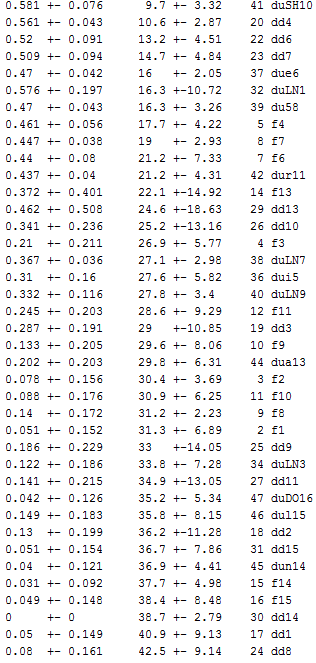

In [110]:
from IPython.display import Image
Image("rank.png")

### Test the accuracy when dropping dd8, dd1, dd14 which are the lowest ranking three features

In [111]:
features = pd.DataFrame(columns=("f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","dd2","dd3","dd4","dd5","dd6","dd7","dd9","dd10","dd11","dd12","dd13","dd15","duLN1","du.2","duLN3","dut4","dui5","due6","duLN7","du58","duLN9","duSH10","dur11","duo12","dua13","dun14","dul15","duDO16",\
                                     "UUID"\
                                     ))

for id in aList:

    print('# Adding instances for User ' + str(id))

    idxn = 0

    for i in range(0, len(df)):

        if df.iloc[i]["UUID"] == id and (df.iloc[i]["Button"] == 'LETTERS' or df.iloc[i]["Button"] == 'NUMBERS') and df.iloc[i]["Action_Type"] == 'Down' and idxn < 50:

            features.loc[len(features)] = [\
                                           
                                            #flying time
                                            int(df.iloc[i+2]["Action_Timestamp"]) - int(df.iloc[i+1]["Action_Timestamp"]),\

                                            int(df.iloc[i+4]["Action_Timestamp"]) - int(df.iloc[i+3]["Action_Timestamp"]),\

                                            int(df.iloc[i+6]["Action_Timestamp"]) - int(df.iloc[i+5]["Action_Timestamp"]),\

                                            int(df.iloc[i+8]["Action_Timestamp"]) - int(df.iloc[i+7]["Action_Timestamp"]),\

                                            int(df.iloc[i+10]["Action_Timestamp"]) - int(df.iloc[i+9]["Action_Timestamp"]),\

                                            int(df.iloc[i+12]["Action_Timestamp"]) - int(df.iloc[i+11]["Action_Timestamp"]),\

                                            int(df.iloc[i+14]["Action_Timestamp"]) - int(df.iloc[i+13]["Action_Timestamp"]),\

                                            int(df.iloc[i+16]["Action_Timestamp"]) - int(df.iloc[i+15]["Action_Timestamp"]),\

                                            int(df.iloc[i+18]["Action_Timestamp"]) - int(df.iloc[i+17]["Action_Timestamp"]),\

                                            int(df.iloc[i+20]["Action_Timestamp"]) - int(df.iloc[i+19]["Action_Timestamp"]),\

                                            int(df.iloc[i+22]["Action_Timestamp"]) - int(df.iloc[i+21]["Action_Timestamp"]),\

                                            int(df.iloc[i+24]["Action_Timestamp"]) - int(df.iloc[i+23]["Action_Timestamp"]),\

                                            int(df.iloc[i+26]["Action_Timestamp"]) - int(df.iloc[i+25]["Action_Timestamp"]),\

                                            int(df.iloc[i+28]["Action_Timestamp"]) - int(df.iloc[i+27]["Action_Timestamp"]),\

                                            int(df.iloc[i+30]["Action_Timestamp"]) - int(df.iloc[i+29]["Action_Timestamp"]),\
                                            
                                            #Down-Down
                                            #int(df.iloc[i+2]["Action_Timestamp"]) - int(df.iloc[i]["Action_Timestamp"]),\

                                            int(df.iloc[i+4]["Action_Timestamp"]) - int(df.iloc[i+2]["Action_Timestamp"]),\

                                            int(df.iloc[i+6]["Action_Timestamp"]) - int(df.iloc[i+4]["Action_Timestamp"]),\

                                            int(df.iloc[i+8]["Action_Timestamp"]) - int(df.iloc[i+6]["Action_Timestamp"]),\

                                            int(df.iloc[i+10]["Action_Timestamp"]) - int(df.iloc[i+8]["Action_Timestamp"]),\

                                            int(df.iloc[i+12]["Action_Timestamp"]) - int(df.iloc[i+10]["Action_Timestamp"]),\

                                            int(df.iloc[i+14]["Action_Timestamp"]) - int(df.iloc[i+12]["Action_Timestamp"]),\

                                            #int(df.iloc[i+16]["Action_Timestamp"]) - int(df.iloc[i+14]["Action_Timestamp"]),\

                                            int(df.iloc[i+18]["Action_Timestamp"]) - int(df.iloc[i+16]["Action_Timestamp"]),\

                                            int(df.iloc[i+20]["Action_Timestamp"]) - int(df.iloc[i+18]["Action_Timestamp"]),\

                                            int(df.iloc[i+22]["Action_Timestamp"]) - int(df.iloc[i+20]["Action_Timestamp"]),\

                                            int(df.iloc[i+24]["Action_Timestamp"]) - int(df.iloc[i+22]["Action_Timestamp"]),\

                                            int(df.iloc[i+26]["Action_Timestamp"]) - int(df.iloc[i+24]["Action_Timestamp"]),\

                                            #int(df.iloc[i+28]["Action_Timestamp"]) - int(df.iloc[i+26]["Action_Timestamp"]),\

                                            int(df.iloc[i+30]["Action_Timestamp"]) - int(df.iloc[i+28]["Action_Timestamp"]),\

                                            
                                           
                                            #down-up(hold time)
                                            int(df.iloc[i+1]["Action_Timestamp"]) - int(df.iloc[i]["Action_Timestamp"]),\

                                            int(df.iloc[i+3]["Action_Timestamp"]) - int(df.iloc[i+2]["Action_Timestamp"]),\

                                            int(df.iloc[i+5]["Action_Timestamp"]) - int(df.iloc[i+4]["Action_Timestamp"]),\

                                            int(df.iloc[i+7]["Action_Timestamp"]) - int(df.iloc[i+6]["Action_Timestamp"]),\

                                            int(df.iloc[i+9]["Action_Timestamp"]) - int(df.iloc[i+8]["Action_Timestamp"]),\

                                            int(df.iloc[i+11]["Action_Timestamp"]) - int(df.iloc[i+10]["Action_Timestamp"]),\

                                            int(df.iloc[i+13]["Action_Timestamp"]) - int(df.iloc[i+12]["Action_Timestamp"]),\

                                            int(df.iloc[i+15]["Action_Timestamp"]) - int(df.iloc[i+14]["Action_Timestamp"]),\

                                            int(df.iloc[i+17]["Action_Timestamp"]) - int(df.iloc[i+16]["Action_Timestamp"]),\

                                            int(df.iloc[i+19]["Action_Timestamp"]) - int(df.iloc[i+18]["Action_Timestamp"]),\

                                            int(df.iloc[i+21]["Action_Timestamp"]) - int(df.iloc[i+20]["Action_Timestamp"]),\

                                            int(df.iloc[i+23]["Action_Timestamp"]) - int(df.iloc[i+22]["Action_Timestamp"]),\

                                            int(df.iloc[i+25]["Action_Timestamp"]) - int(df.iloc[i+24]["Action_Timestamp"]),\

                                            int(df.iloc[i+27]["Action_Timestamp"]) - int(df.iloc[i+26]["Action_Timestamp"]),\

                                            int(df.iloc[i+29]["Action_Timestamp"]) - int(df.iloc[i+28]["Action_Timestamp"]),\

                                            int(df.iloc[i+31]["Action_Timestamp"]) - int(df.iloc[i+30]["Action_Timestamp"]),\
                                            


                                            #Touch size for each key entry
                                            #df.iloc[i+1]["Touch_Size"],\

                                            #df.iloc[i+3]["Touch_Size"],\

                                            #df.iloc[i+5]["Touch_Size"],\

                                            #df.iloc[i+7]["Touch_Size"],\

                                            #df.iloc[i+9]["Touch_Size"],\

                                            #df.iloc[i+11]["Touch_Size"],\

                                            #df.iloc[i+13]["Touch_Size"],\

                                            #df.iloc[i+15]["Touch_Size"],\

                                            #df.iloc[i+17]["Touch_Size"],\

                                            #df.iloc[i+19]["Touch_Size"],\

                                            #df.iloc[i+21]["Touch_Size"],\

                                            #df.iloc[i+23]["Touch_Size"],\

                                            #df.iloc[i+25]["Touch_Size"],\

                                            #df.iloc[i+27]["Touch_Size"],\

                                            #df.iloc[i+29]["Touch_Size"],\

                                            #df.iloc[i+31]["Touch_Size"],\
                                            id\

                                            ]

            idxn = idxn +1

            i = i + 32

# Adding instances for User test4
# Adding instances for User test5
# Adding instances for User test3
# Adding instances for User test2
# Adding instances for User test1


In [112]:
X, y = features.iloc[:, : -1  ],features.iloc[:,-1]

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [114]:
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (200, 43)
y_train shape: (200,)
X_test shape: (50, 43)
y_test shape: (50,)


In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

In [116]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [117]:
rf.predict(X_train)

array(['test1', 'test5', 'test3', 'test3', 'test2', 'test3', 'test3',
       'test4', 'test4', 'test3', 'test2', 'test2', 'test2', 'test2',
       'test4', 'test2', 'test4', 'test2', 'test3', 'test5', 'test5',
       'test1', 'test2', 'test2', 'test2', 'test5', 'test5', 'test1',
       'test2', 'test1', 'test5', 'test4', 'test2', 'test4', 'test5',
       'test1', 'test5', 'test3', 'test5', 'test5', 'test3', 'test2',
       'test5', 'test3', 'test4', 'test4', 'test4', 'test2', 'test3',
       'test4', 'test1', 'test5', 'test5', 'test1', 'test3', 'test1',
       'test5', 'test1', 'test5', 'test1', 'test3', 'test3', 'test3',
       'test5', 'test5', 'test2', 'test3', 'test1', 'test5', 'test2',
       'test4', 'test2', 'test1', 'test2', 'test1', 'test2', 'test1',
       'test2', 'test5', 'test3', 'test2', 'test2', 'test4', 'test1',
       'test2', 'test4', 'test3', 'test3', 'test4', 'test1', 'test1',
       'test2', 'test1', 'test5', 'test2', 'test1', 'test1', 'test4',
       'test2', 'tes

In [118]:
rfscores = cross_val_score(rf, X_train, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.7826087   0.77272727  0.86363636  0.80952381  0.85        0.65
  0.94444444  0.94444444  0.77777778  0.94444444]  mean: 0.83396072526507292  std: 0.090410


In [119]:
rf1 = RandomForestClassifier(n_estimators = 50)
rfscores1 = cross_val_score(rf1, X_train, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores1), np.mean(rfscores1), np.std(rfscores1)))

random forest scores: [ 0.91304348  0.86363636  0.77272727  0.9047619   0.95        0.8
  0.88888889  0.88888889  0.94444444  1.        ]  mean: 0.89263912416086344  std: 0.064725


### The accuracy was increased when I keep dropping the features having lowest rank until the 'dul15'. 

In [120]:
features_new = features.drop("f15", axis=1, level=None, inplace=False, errors='raise')
features_new = features.drop("f14", axis=1, level=None, inplace=False, errors='raise')
features_new = features.drop("dun14", axis=1, level=None, inplace=False, errors='raise')
features_new = features.drop("dd15", axis=1, level=None, inplace=False, errors='raise')
features_new = features.drop("dd2", axis=1, level=None, inplace=False, errors='raise')
#features_new = features.drop("dul15", axis=1, level=None, inplace=False, errors='raise')
#features_new = features.drop("duDO16", axis=1, level=None, inplace=False, errors='raise')

Drop f15, f14, dun14, dd15, dd2, dul15, duDO16

In [121]:
X, y = features_new.iloc[:, : -1  ],features_new.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (200, 42)
y_train shape: (200,)
X_test shape: (50, 42)
y_test shape: (50,)


# Classification accuracy test after feature normalization(Trainning data SamsungS accuracy=80.7%)

In [122]:
from sklearn import preprocessing
X1=X_train.values
new_X=(X1-X1.min())/(X1.max()-X1.min())
new_X=pd.DataFrame(new_X)
#new_X.drop(0, axis=1)
new_X.shape

(200, 42)

### Train the model rfn

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfn = RandomForestClassifier(random_state=1)
rfn.fit(new_X,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [124]:
rfscores = cross_val_score(rfn, new_X, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.7826087   0.81818182  0.77272727  0.76190476  0.75        0.85
  0.83333333  0.83333333  0.83333333  0.83333333]  mean: 0.80687558817993599  std: 0.034351


### By using the SamsungS dataset as trainning data and SamsungL as testing data, the result= 72.9%

In [125]:
with open('redo_SamsungL.csv', 'r') as f:
    SamsungL = pd.read_csv(f, sep=',', low_memory=False)

In [126]:
SamsungL=SamsungL.drop('ID',axis=1)
SamsungL

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,du58,duLN9,duSH10,dur11,duo12,dua13,dun14,dul15,duDO16,UUID
0,547.0,636.0,697.0,260.0,705.0,797.0,762.0,534.0,332.0,608.0,...,96.0,87.0,85.0,96.0,88.0,119.0,104.0,88.0,97.0,test1
1,697.0,260.0,705.0,797.0,762.0,534.0,332.0,608.0,370.0,161.0,...,85.0,96.0,88.0,119.0,104.0,88.0,97.0,118.0,88.0,test1
2,762.0,534.0,332.0,608.0,370.0,161.0,237.0,308.0,664.0,1203.0,...,104.0,88.0,97.0,118.0,88.0,85.0,111.0,104.0,120.0,test1
3,332.0,608.0,370.0,161.0,237.0,308.0,664.0,1203.0,428.0,380.0,...,97.0,118.0,88.0,85.0,111.0,104.0,120.0,114.0,83.0,test1
4,428.0,380.0,687.0,263.0,354.0,496.0,631.0,556.0,413.0,470.0,...,83.0,109.0,112.0,109.0,95.0,111.0,96.0,80.0,98.0,test1
5,687.0,263.0,354.0,496.0,631.0,556.0,413.0,470.0,381.0,234.0,...,112.0,109.0,95.0,111.0,96.0,80.0,98.0,105.0,88.0,test1
6,631.0,556.0,413.0,470.0,381.0,234.0,273.0,1109.0,115.0,463.0,...,96.0,80.0,98.0,105.0,88.0,85.0,72.0,144.0,109.0,test1
7,413.0,470.0,381.0,234.0,273.0,1109.0,115.0,463.0,790.0,129.0,...,98.0,105.0,88.0,85.0,72.0,144.0,109.0,96.0,96.0,test1
8,578.0,1033.0,748.0,264.0,215.0,496.0,556.0,528.0,350.0,499.0,...,100.0,105.0,102.0,120.0,134.0,97.0,109.0,96.0,85.0,test1
9,748.0,264.0,215.0,496.0,556.0,528.0,350.0,499.0,247.0,272.0,...,102.0,120.0,134.0,97.0,109.0,96.0,85.0,98.0,76.0,test1


In [127]:
X, y = SamsungL.iloc[:, : -1  ],SamsungL.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [128]:
from sklearn import preprocessing
X1=X_train.values
new_X=(X1-X1.min())/(X1.max()-X1.min())
new_X=pd.DataFrame(new_X)
#new_X.drop(0, axis=1)
new_X.shape

(200, 42)

In [129]:
rfscores = cross_val_score(rfn, new_X, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.82608696  0.72727273  0.81818182  0.85714286  0.65        0.8         0.5
  0.72222222  0.72222222  0.66666667]  mean: 0.72897954702302536  std: 0.100749


### In order to decrease the impact, I tried to measure the difference between these two devices features by SamsungS features mean/SamsungL features mean=n set. Then I mutiplie each features in SamsungL with the value from n set to shitf the value colser to SamsungS. 

In [130]:
with open('mutiply_SamsungL.csv', 'r') as f:
    multiply_SamsungL = pd.read_csv(f, sep=',', low_memory=False)

In [131]:
multiply_SamsungL=multiply_SamsungL.drop('ID',axis=1)

In [132]:
X, y = multiply_SamsungL.iloc[:, : -1  ],multiply_SamsungL.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [133]:
from sklearn import preprocessing
X1=X_train.values
new_X=(X1-X1.min())/(X1.max()-X1.min())
new_X=pd.DataFrame(new_X)
#new_X.drop(0, axis=1)
new_X.shape

(200, 42)

### However, the accuracy wasn't increased.

In [134]:
rfscores = cross_val_score(rfn, new_X, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.7826087   0.63636364  0.63636364  0.61904762  0.65        0.8
  0.72222222  0.77777778  0.88888889  0.72222222]  mean: 0.72354946985381763  std: 0.084349


### Nexus5 accuracy=86%

In [159]:
with open('redo_Nexus5.csv', 'r') as f:
    Nexus5 = pd.read_csv(f, sep=',', low_memory=False)

In [160]:
Nexus5=Nexus5.drop('ID',axis=1)

In [161]:
X, y = Nexus5.iloc[:, : -1  ],Nexus5.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [162]:
from sklearn import preprocessing
X1=X_train.values
new_X=(X1-X1.min())/(X1.max()-X1.min())
new_X=pd.DataFrame(new_X)
#new_X.drop(0, axis=1)
new_X.shape

(200, 42)

In [163]:
rfscores = cross_val_score(rfn, new_X, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.86956522  0.95454545  0.86363636  0.76190476  0.8         0.95
  0.83333333  0.88888889  0.83333333  0.88888889]  mean: 0.86440962419223288  std: 0.057674


### Nexus7 accuracy=83.9%

In [164]:
with open('redo_Nexus7.csv', 'r') as f:
    Nexus7 = pd.read_csv(f, sep=',', low_memory=False)

In [165]:
Nexus7=Nexus7.drop('ID',axis=1)

In [166]:
X, y = Nexus7.iloc[:, : -1  ],Nexus7.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [167]:
from sklearn import preprocessing
X1=X_train.values
new_X=(X1-X1.min())/(X1.max()-X1.min())
new_X=pd.DataFrame(new_X)
#new_X.drop(0, axis=1)
new_X.shape

(200, 42)

In [168]:
rfscores = cross_val_score(rfn, new_X, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.91304348  0.77272727  0.81818182  0.95238095  0.85        0.75
  0.77777778  0.88888889  0.83333333  0.83333333]  mean: 0.83896668548842457  std: 0.061242


### SamsungL as Trainning set

In [169]:
X, y = SamsungL.iloc[:, : -1  ],SamsungL.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [170]:
from sklearn import preprocessing
X1=X_train.values
new_X=(X1-X1.min())/(X1.max()-X1.min())
new_X=pd.DataFrame(new_X)
#new_X.drop(0, axis=1)
new_X.shape

(200, 42)

In [171]:
from sklearn.ensemble import RandomForestClassifier
rfn = RandomForestClassifier(random_state=1)
rfn.fit(new_X,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [172]:
rfscores = cross_val_score(rfn, new_X, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.82608696  0.72727273  0.81818182  0.85714286  0.65        0.8         0.5
  0.72222222  0.72222222  0.66666667]  mean: 0.72897954702302536  std: 0.100749


In [173]:
X, y = features.iloc[:, : -1  ],features.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [174]:
rfscores = cross_val_score(rfn, X_train, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.7826087   0.77272727  0.86363636  0.80952381  0.85        0.65
  0.94444444  0.94444444  0.77777778  0.94444444]  mean: 0.83396072526507292  std: 0.090410


# End(The part below was the feature engineering part)

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [176]:
rf.predict(X_train)

array(['test1', 'test5', 'test3', 'test3', 'test2', 'test3', 'test3',
       'test4', 'test4', 'test3', 'test2', 'test2', 'test2', 'test2',
       'test4', 'test2', 'test4', 'test2', 'test3', 'test5', 'test5',
       'test1', 'test2', 'test2', 'test2', 'test5', 'test5', 'test1',
       'test2', 'test1', 'test5', 'test4', 'test2', 'test4', 'test5',
       'test1', 'test5', 'test3', 'test5', 'test5', 'test3', 'test2',
       'test5', 'test3', 'test4', 'test4', 'test4', 'test2', 'test3',
       'test4', 'test1', 'test5', 'test5', 'test1', 'test3', 'test1',
       'test5', 'test1', 'test5', 'test1', 'test3', 'test3', 'test3',
       'test5', 'test5', 'test2', 'test3', 'test1', 'test5', 'test2',
       'test4', 'test2', 'test1', 'test2', 'test1', 'test2', 'test1',
       'test2', 'test5', 'test3', 'test2', 'test2', 'test4', 'test1',
       'test2', 'test4', 'test3', 'test3', 'test4', 'test1', 'test1',
       'test2', 'test1', 'test5', 'test2', 'test1', 'test1', 'test4',
       'test2', 'tes

### By managing the 10 features having lowest ranking, the highest accuracy is 81.2 which is lower than 83%

In [177]:
rfscores = cross_val_score(rf, X_train, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores), np.mean(rfscores), np.std(rfscores)))

random forest scores: [ 0.7826087   0.77272727  0.86363636  0.80952381  0.85        0.65
  0.94444444  0.94444444  0.77777778  0.94444444]  mean: 0.83396072526507292  std: 0.090410


### However, the accuracy reached 92.058284710458627 after randomForestClassifier which was the highest in my project

In [178]:
rf1 = RandomForestClassifier(n_estimators = 50)
rfscores1 = cross_val_score(rf1, X_train, y_train, cv = 10)
print("random forest scores: %s  mean: %r  std: %f" % (str(rfscores1), np.mean(rfscores1), np.std(rfscores1)))

random forest scores: [ 0.91304348  0.90909091  0.81818182  0.9047619   0.9         0.85
  0.88888889  0.94444444  0.88888889  0.88888889]  mean: 0.8906189221406613  std: 0.033069


In [179]:
features_new.to_csv('SamsungS_features.csv')

In [180]:
features_new.shape

(250, 43)

In [181]:
features_new.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,duLN7,du58,duLN9,duSH10,dur11,duo12,dua13,dun14,dul15,duDO16
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000
mean,439.116000,350.792000,360.080000,346.192000,340.580000,366.136000,413.50000,1252.620000,406.516000,1209.320000,...,79.596000,75.908000,78.524000,77.892000,80.408000,77.860000,77.508000,75.364000,76.02000,73.532000
std,213.001797,247.646344,240.836647,242.443425,398.294037,390.907159,413.88025,9470.902132,284.855296,9470.313145,...,22.974772,19.732232,21.589857,22.116348,22.262254,22.890704,20.836183,20.939948,20.07685,19.830228
min,151.000000,52.000000,13.000000,28.000000,13.000000,28.000000,51.00000,69.000000,52.000000,28.000000,...,40.000000,26.000000,27.000000,26.000000,27.000000,28.000000,27.000000,28.000000,27.00000,28.000000
25%,327.250000,197.250000,195.000000,197.250000,114.500000,207.250000,212.00000,254.000000,253.000000,197.000000,...,68.000000,67.000000,68.000000,67.000000,68.000000,68.000000,68.000000,68.000000,68.00000,56.000000
50%,397.000000,297.500000,356.500000,311.500000,266.000000,296.500000,350.50000,369.000000,351.000000,354.500000,...,81.000000,70.000000,81.000000,79.500000,82.000000,81.000000,70.000000,70.000000,70.00000,69.000000
75%,511.250000,416.000000,449.500000,430.750000,430.000000,430.750000,493.75000,748.000000,471.000000,751.750000,...,91.000000,83.750000,91.000000,93.500000,96.000000,83.750000,84.000000,83.000000,83.00000,83.000000
max,1777.000000,2009.000000,1777.000000,1832.000000,4994.000000,4994.000000,4994.00000,148897.000000,2505.000000,148897.000000,...,250.000000,167.000000,167.000000,208.000000,139.000000,250.000000,167.000000,250.000000,167.00000,208.000000


features_new = features_new[features_new.f1 < 5000]
features_new = features_new[features_new.f2 < 5000]
features_new = features_new[features_new.f3 < 5000]
features_new = features_new[features_new.f4 < 5000]
features_new = features_new[features_new.f5 < 5000]
features_new = features_new[features_new.f6 < 5000]
features_new = features_new[features_new.f7 < 5000]
features_new = features_new[features_new.f8 < 5000]
features_new = features_new[features_new.f9 < 5000]
features_new = features_new[features_new.f10 < 5000]
features_new = features_new[features_new.f11 < 5000]
features_new = features_new[features_new.f12 < 5000]
features_new = features_new[features_new.f13 < 5000]

features_new = features_new[features_new.dd3 < 5000]
features_new = features_new[features_new.dd4 < 5000]
features_new = features_new[features_new.dd5 < 5000]
features_new = features_new[features_new.dd6 < 5000]
features_new = features_new[features_new.dd7 < 5000]
features_new = features_new[features_new.dd9 < 5000]
features_new = features_new[features_new.dd10 < 5000]
features_new = features_new[features_new.dd11 < 5000]
features_new = features_new[features_new.dd12 < 5000]
features_new = features_new[features_new.dd13 < 5000]


In [182]:
features_new

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,du58,duLN9,duSH10,dur11,duo12,dua13,dun14,dul15,duDO16,UUID
0,1420.0,614.0,926.0,170.0,799.0,366.0,340.0,311.0,255.0,597.0,...,70.0,55.0,69.0,68.0,84.0,83.0,69.0,69.0,98.0,test4
1,926.0,170.0,799.0,366.0,340.0,311.0,255.0,597.0,468.0,410.0,...,69.0,68.0,84.0,83.0,69.0,69.0,98.0,40.0,69.0,test4
2,340.0,311.0,255.0,597.0,468.0,410.0,227.0,226.0,240.0,1178.0,...,69.0,69.0,98.0,40.0,69.0,84.0,55.0,28.0,41.0,test4
3,255.0,597.0,468.0,410.0,227.0,226.0,240.0,1178.0,411.0,168.0,...,98.0,40.0,69.0,84.0,55.0,28.0,41.0,83.0,69.0,test4
4,411.0,168.0,383.0,169.0,212.0,241.0,369.0,367.0,212.0,397.0,...,69.0,84.0,55.0,56.0,56.0,98.0,83.0,42.0,69.0,test4
5,383.0,169.0,212.0,241.0,369.0,367.0,212.0,397.0,268.0,169.0,...,55.0,56.0,56.0,98.0,83.0,42.0,69.0,97.0,70.0,test4
6,369.0,367.0,212.0,397.0,268.0,169.0,184.0,253.0,169.0,837.0,...,83.0,42.0,69.0,97.0,70.0,97.0,54.0,69.0,28.0,test4
7,212.0,397.0,268.0,169.0,184.0,253.0,169.0,837.0,382.0,396.0,...,69.0,97.0,70.0,97.0,54.0,69.0,28.0,84.0,41.0,test4
8,382.0,396.0,540.0,156.0,283.0,482.0,383.0,326.0,254.0,341.0,...,41.0,83.0,55.0,69.0,41.0,83.0,70.0,55.0,41.0,test4
9,540.0,156.0,283.0,482.0,383.0,326.0,254.0,341.0,383.0,240.0,...,55.0,69.0,41.0,83.0,70.0,55.0,41.0,83.0,69.0,test4


### After deleted the rows which have too large flying time and dd time, the result is decreased. Thus I deleted this step.

# Final accuracy: 92.05%